**Script Name:** Basic Image Operations (Public).ipynb </br>
**Description:** This script is used for demonstrating the basic image operations: </br>
*   Read and display a medical image.
*   Resize the image while maintaining its aspect ratio.
*   Crop a region of interest from the image.
*   Rotate the cropped image by a specified angle.
*   Flip the rotated image horizontally.
*   Save the modified image in a desired format.
*   Display the original and modified images for comparison.

**Author:** Jetsada Arnin, PhD </br>
**Date:** March 29, 2023 </br>
*Copyright (c) 2023 Jetsada Arnin*



In [1]:
#@title Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

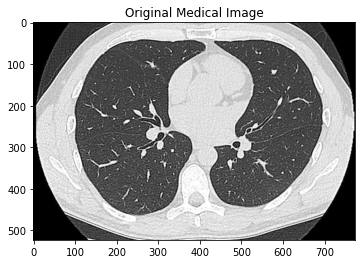

In [4]:
#@title Read and display the medical image
image = cv2.imread('./img/CT_image.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('Original Medical Image')
plt.show()

In [5]:
#@title Resize the image while maintaining its aspect ratio
new_width = 400
new_height = int(image.shape[0] * (new_width / image.shape[1]))
resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

In [6]:
#@title Crop a region of interest
start_row, end_row = 50, 250
start_col, end_col = 100, 300
cropped_image = resized_image[start_row:end_row, start_col:end_col]

In [7]:
#@title Rotate the cropped image by a specified angle
angle = 45
center = (cropped_image.shape[1] // 2, cropped_image.shape[0] // 2)
rot_mat = cv2.getRotationMatrix2D(center, angle, 1)
rotated_image = cv2.warpAffine(cropped_image, rot_mat, (cropped_image.shape[1], cropped_image.shape[0]))

In [8]:
#@title Flip the rotated image horizontally and vertically
flip_horizontal = cv2.flip(rotated_image, 1)
flip_vertical = cv2.flip(rotated_image, 0)

In [9]:
#@title Save the modified image in a desired format
cv2.imwrite('./img/ourput.png', flip_horizontal, [cv2.IMWRITE_PNG_COMPRESSION, 9])

True

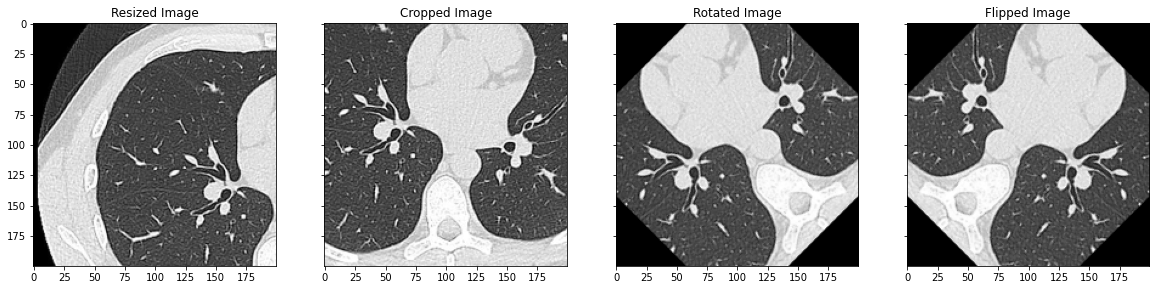

In [10]:
#@title Display the modified images
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharex=True, sharey=True)
axes[0].imshow(resized_image, cmap='gray')
axes[0].set_title('Resized Image')
axes[1].imshow(cropped_image, cmap='gray')
axes[1].set_title('Cropped Image')
axes[2].imshow(rotated_image, cmap='gray')
axes[2].set_title('Rotated Image')
axes[3].imshow(flip_horizontal, cmap='gray')
axes[3].set_title('Flipped Image')
plt.show()